# **Data Science for Decision Support**


**Executor:** Raniyaharini Rajendran

---
individual data variant:

| Task5, Q5 | Task 5 Q5 | Task 3     | Task 3  |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| CatBoost       | Random forest       | 5,6        | 6,8        |





# Problem: **Regression**  

# **`Task 1 “Prediction with neural network” `**

1) Do all preparation steps as in previous assignments to clean, scale and prepare the dataset
for the analysis.  

In [2]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [3]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Write your code here 
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics,svm
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import time
import random
from scipy.stats import uniform, randint
import ipywidgets as widgets
from IPython.display import clear_output

In [5]:
#add more cell if needed to each code cell
bike_df = pd.read_csv('Bike Sharing_day.csv')

In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [8]:
#Write your code here 
#Renaming the columns for better understanding
bike_df.rename(columns={'instant':'id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)
bike_df.head()

id    datetime  season  year  month  holiday  weekday  workingday  \
0   1  01-01-2018       1     0      1        0        6           0   
1   2  02-01-2018       1     0      1        0        0           0   
2   3  03-01-2018       1     0      1        0        1           1   
3   4  04-01-2018       1     0      1        0        2           1   
4   5  05-01-2018       1     0      1        0        3           1   

   weather_condition       temp     atemp  humidity  windspeed  casual  \
0                  2  14.110847  18.18125   80.5833  10.749882     331   
1                  2  14.902598  17.68695   69.6087  16.652113     131   
2                  1   8.050924   9.47025   43.7273  16.636703     120   
3                  1   8.200000  10.60610   59.0435  10.739832     108   
4                  1   9.305237  11.46350   43.6957  12.522300      82   

   registered  total_count  
0         654          985  
1         670          801  
2        1229         1349  
3        1454         1562  
4        1518         1600

Typecasting was eliminated when I decided to use the neural network focussing on binary instead of categorical. Therefore this segment of code is irrelevant

In [ ]:
'''#Type casting the datetime 

bike_df['datetime']=pd.to_datetime(bike_df.datetime)

#Typecasting numerical attributes to category
bike_df['season']=bike_df.season.astype('category')
bike_df['year']=bike_df.year.astype('category')
bike_df['month']=bike_df.month.astype('category')
bike_df['holiday']=bike_df.holiday.astype('category')
bike_df['weekday']=bike_df.weekday.astype('category')
bike_df['workingday']=bike_df.workingday.astype('category')
bike_df['weather_condition']=bike_df.weather_condition.astype('category')'''



"#Type casting the datetime \n\nbike_df['datetime']=pd.to_datetime(bike_df.datetime)\n\n#Typecasting numerical attributes to category\nbike_df['season']=bike_df.season.astype('category')\nbike_df['year']=bike_df.year.astype('category')\nbike_df['month']=bike_df.month.astype('category')\nbike_df['holiday']=bike_df.holiday.astype('category')\nbike_df['weekday']=bike_df.weekday.astype('category')\nbike_df['workingday']=bike_df.workingday.astype('category')\nbike_df['weather_condition']=bike_df.weather_condition.astype('category')"

In [9]:
#Checking for NAN values
bike_df.isnull().sum()

id                   0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

The result shows there are no null values present in the dataset

In [10]:
#No categorical data
#Variables to remove before modelling: ['id','datetime','casual','registered']
bike_df = bike_df.drop(columns = ['id','datetime','casual','registered'])

In [11]:
bike_df.corr()

season          year         month   holiday  \
season             1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868   
year              -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195   
month              8.310321e-01 -5.162656e-16  1.000000e+00  0.018905   
holiday           -1.086804e-02  8.195345e-03  1.890483e-02  1.000000   
weekday           -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962   
workingday         1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948   
weather_condition  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395   
temp               3.333607e-01  4.878919e-02  2.190833e-01 -0.028764   
atemp              3.420139e-01  4.721519e-02  2.264302e-01 -0.032703   
humidity           2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662   
windspeed         -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257   
total_count        4.045838e-01  5.697285e-01  2.781909e-01 -0.068764   

                    weekday  workingday  weather_condition      temp  \
season            -0.003081    0.013762           0.021306  0.333361   
year              -0.005466   -0.002945          -0.050322  0.048789   
month              0.009523   -0.004688           0.045613  0.219083   
holiday           -0.101962   -0.252948          -0.034395 -0.028764   
weekday            1.000000    0.035800           0.031112 -0.000168   
workingday         0.035800    1.000000           0.060236  0.053470   
weather_condition  0.031112    0.060236           1.000000 -0.119503   
temp              -0.000168    0.053470          -0.119503  1.000000   
atemp             -0.007539    0.052940          -0.120559  0.991696   
humidity          -0.052290    0.023202           0.590277  0.128565   
windspeed          0.014283   -0.018666           0.039769 -0.158186   
total_count        0.067534    0.062542          -0.295929  0.627044   

                      atemp  humidity  windspeed  total_count  
season             0.342014  0.208220  -0.229607     0.404584  
year               0.047215 -0.112547  -0.011624     0.569728  
month              0.226430  0.224937  -0.208013     0.278191  
holiday           -0.032703 -0.015662   0.006257    -0.068764  
weekday           -0.007539 -0.052290   0.014283     0.067534  
workingday         0.052940  0.023202  -0.018666     0.062542  
weather_condition -0.120559  0.590277   0.039769    -0.295929  
temp               0.991696  0.128565  -0.158186     0.627044  
atemp              1.000000  0.141512  -0.183876     0.630685  
humidity           0.141512  1.000000  -0.248506    -0.098543  
windspeed         -0.183876 -0.248506   1.000000    -0.235132  
total_count        0.630685 -0.098543  -0.235132     1.000000

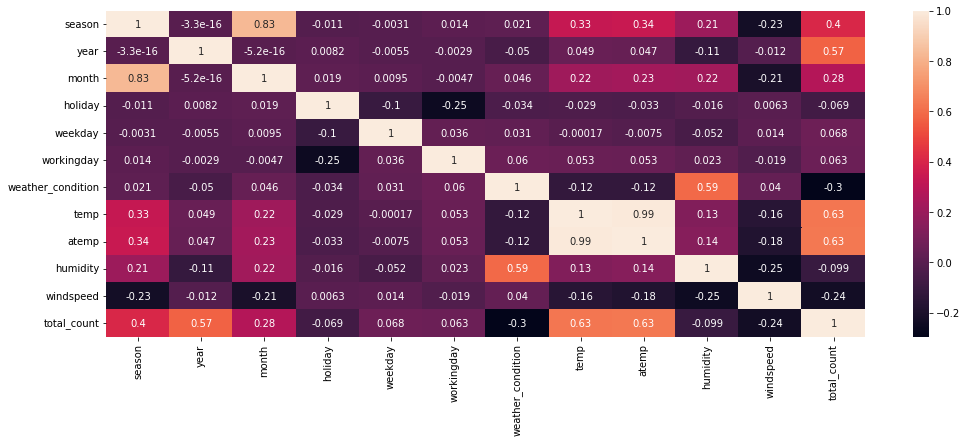

In [11]:
#Heatmap
plt.figure(figsize=(17,6))
sns.heatmap(bike_df.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6133e12650>,
      dtype=object)

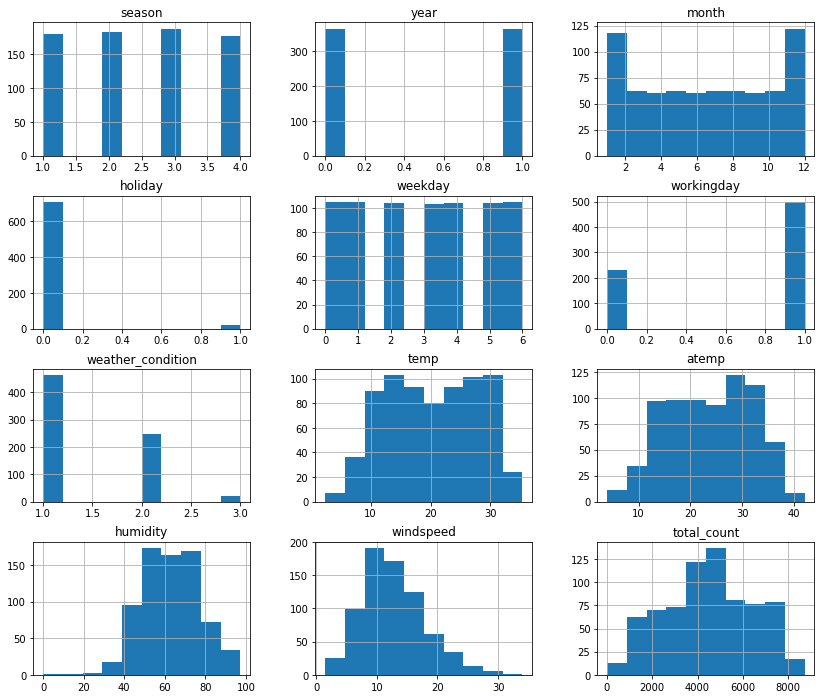

In [11]:
#Building 2D dependencies between each pair of variables
bike_df.hist(figsize = (14,12))

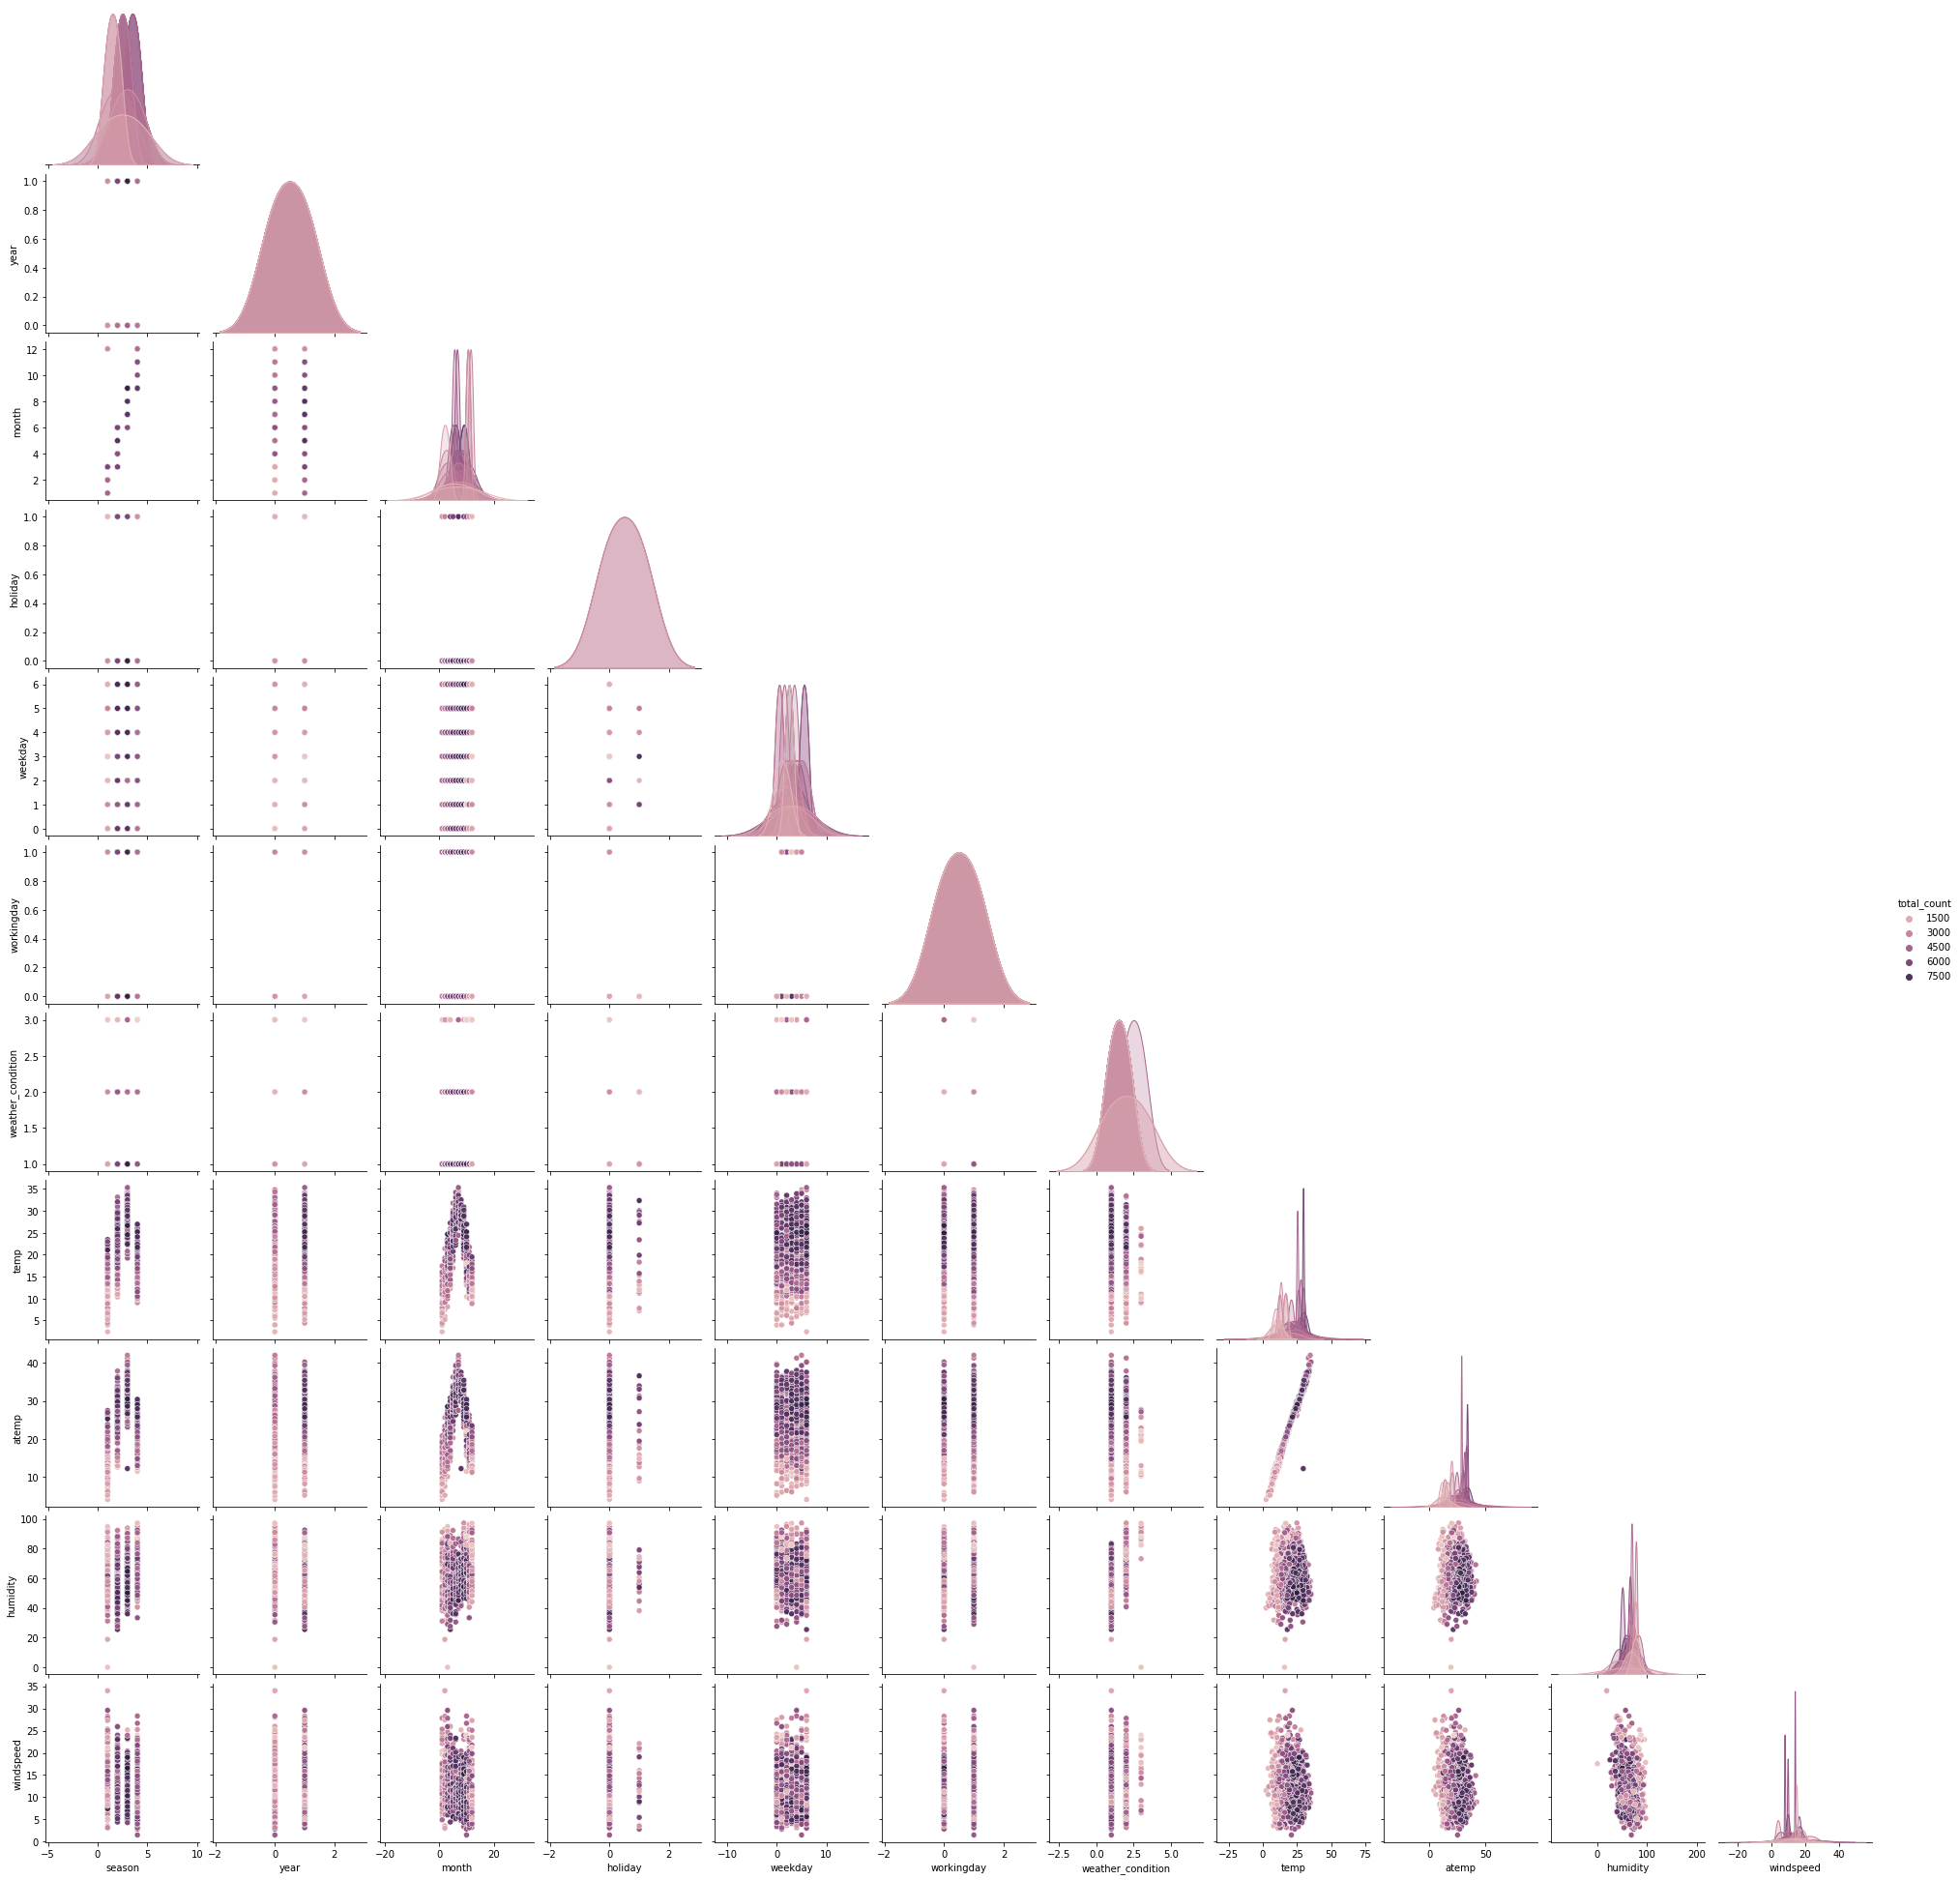

In [12]:
sns.pairplot(bike_df,hue='total_count',corner=True)

Here, there are no highly correlated attributes

2) Construct a fully connected neural network using “keras” library. The network should
contain 1-2 hidden layers. Experiment with different number of neurons for each layer, try
several dropout layers between hidden layers. Try to achieve the performance near or better
than the best one of your previous methods. Present the performance results (predictions,
R2, MSE, MAE) for the testset with 3 best architectures as a table. Use repeated holdout crossvalidation, generating 5 random training sets and test sets with proportion according to
your individual variant .


In [12]:
#Write your code here 
X = bike_df.drop(["total_count"], axis =1)
y = bike_df["total_count"]


In [13]:
#Splitting training and test set based on individual variant in assignment 2 - 90:10
# repeated holdout cross-validation(random_state =5)
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state=5)

From the results of the assignment 2 it was clear that StandardScalar performed better than MinMax Scalar. Therefore in this assignement we are using StandardScalar

In [14]:
#Standard Scaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

Here,the neural network was constructed with 1-Input layer, 2-Hidden layer, 2-Droupout layer and 1-Output layer. The neural network holds 3 neurons - relu, sigmoid and softmax.

I tried using sigmoid as the output layer as the y_test and y_train features remains as binary. Manipulation of binary variables was performed here. Hence, loss function was declared as binary_crossentropy

In [15]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
from tensorflow.keras.utils import to_categorical


In [45]:
import tensorflow as tf
def create_model():
	# create model
  model = models.Sequential()
  model.add(Dense(11, activation='relu',input_shape=(X_train.shape[1],)))#Input layer
  model.add(Dropout(0.25))#Dropout layer
  model.add(Dense(5, activation='sigmoid'))#Hidden layer
  model.add(Dropout(0.25))#Dropout layer
  model.add(Dense(1, activation='sigmoid'))#Output layer
    
  #model.add(tf.keras.layers.Dense(, activation='softmax'))
    
  # Compile model
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model

#train_labels = to_categorical(y_train,3)
#test_labels = to_categorical(y_test,3)
#nx, ny = X_train.shape
#d2_train_dataset = X_train.reshape(nx*ny)
model = KerasRegressor(model=create_model, epochs=20, batch_size=40, verbose=1)
model.fit(X_train,y_train)


Epoch 1/20
17/17 [==============================] - 1s 4ms/step - loss: -117.8994 - accuracy: 0.0000e+00
Epoch 2/20
17/17 [==============================] - 0s 3ms/step - loss: -835.4940 - accuracy: 0.0000e+00
Epoch 3/20
17/17 [==============================] - 0s 3ms/step - loss: -1409.9106 - accuracy: 0.0000e+00
Epoch 4/20
17/17 [==============================] - 0s 3ms/step - loss: -1729.3944 - accuracy: 0.0000e+00
Epoch 5/20
17/17 [==============================] - 0s 3ms/step - loss: -2181.9150 - accuracy: 0.0000e+00
Epoch 6/20
17/17 [==============================] - 0s 3ms/step - loss: -2898.3713 - accuracy: 0.0000e+00
Epoch 7/20
17/17 [==============================] - 0s 3ms/step - loss: -3536.3345 - accuracy: 0.0000e+00
Epoch 8/20
17/17 [==============================] - 0s 3ms/step - loss: -4254.9624 - accuracy: 0.0000e+00
Epoch 9/20
17/17 [==============================] - 0s 3ms/step - loss: -4901.2300 - accuracy: 0.0000e+00
Epoch 10/20
17/17 [=============================

KerasRegressor(
	model=<function create_model at 0x7fe2f5a0fd40>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=40
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=20
)

In [ ]:
import tensorflow as tf
from yellowbrick.classifier import ROCAUC
def create_model():
	# create model
  model = models.Sequential()
  #Using 3 types of neurons (relu,sigmoid and softmax)
  model.add(Dense(11, activation='relu',input_shape=(X_train.shape[1],)))#Input layer
  model.add(Dropout(0.25))#Dropout layer
  model.add(Dense(5, activation='sigmoid'))#Hidden layer
  model.add(Dropout(0.25))#Dropout layer
  model.add(Dense(3, activation='softmax'))#Output layer 
  # Compile model
  model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

train_labels = to_categorical(y_train,2)
test_labels = to_categorical(y_test,2)

model = KerasRegressor(model=create_model, epochs=20, batch_size=40, verbose=1)
model.fit(X_train,train_labels)

  #Accuracy score,precision,recall and F1-score
y_pred=model.predict(X_test)
acc = accuracy_score(y_pred,test_labels)
print('Accuracy Score is:',acc)

  #There are some labels in test_labels which doesn't appear in y_pred, hence we explicitly mention labels=np.unique(y_pred)
print(classification_report(test_labels, y_pred,labels=np.unique(y_pred)))

In [17]:
r2_scores = cross_val_score(model, X_train, y_train, cv=5)
print('R-squared score :',np.average(r2_scores))

Epoch 1/20
14/14 [==============================] - 0s 2ms/step - loss: 1469.0457 - accuracy: 0.0000e+00
Epoch 2/20
14/14 [==============================] - 0s 2ms/step - loss: 706.7800 - accuracy: 0.0000e+00
Epoch 3/20
14/14 [==============================] - 0s 3ms/step - loss: -31.0933 - accuracy: 0.0000e+00
Epoch 4/20
14/14 [==============================] - 0s 2ms/step - loss: -728.1949 - accuracy: 0.0000e+00
Epoch 5/20
14/14 [==============================] - 0s 2ms/step - loss: -1438.6316 - accuracy: 0.0000e+00
Epoch 6/20
14/14 [==============================] - 0s 3ms/step - loss: -2131.7786 - accuracy: 0.0000e+00
Epoch 7/20
14/14 [==============================] - 0s 2ms/step - loss: -2816.8125 - accuracy: 0.0000e+00
Epoch 8/20
14/14 [==============================] - 0s 3ms/step - loss: -3520.6809 - accuracy: 0.0000e+00
Epoch 9/20
14/14 [==============================] - 0s 2ms/step - loss: -4206.2681 - accuracy: 0.0000e+00
Epoch 10/20
14/14 [==============================] -

In [18]:
#MAE,MSE,RMSE
y_pred=model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2/2 [==============================] - 0s 6ms/step
MAE: 4647.524085610697
MSE: 24988844.19954258
RMSE: 4998.884295474599


# **`Task 2 “Evaluate the variable importance in your built deep neural network”  `**

2) Use “Permutation Importance” method to calculate the variables importance of your build neural networks. Use from sklearn.inspection import permutation_importance.

In [19]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 26.4 MB/s 
     |████████████████████████████████| 133 kB 47.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=1ecfea61676c197e175280760b14df1b137dfdbd877ca44a2ac376405e2d93b5
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inc

In [20]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model, random_state=1).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = ['season','year','month','holiday','weekday','workingday','weather_condition','temp','atemp','humidity','windspeed',])

17/17 [==============================] - 0s 4ms/step


Feature importance can be measured by looking at how much the score decreases when a feature is not available.

To do that one can remove feature from the dataset, re-train the estimator and check the score. But it is computationally intensive.

Instead of removing a feature we can replace it with random noise - feature values - this is how permutation importance is computed using eli5.

Here I tried using the 'default PermutationImportance' from sklearn as well as 'rfpimp' to compute but I faced issues while trying to compute the importance especially for neural work. Hence instead of dropping feature I shuffled them to compute importance.

3) Take linear regression results of interpretability, which correspond to model coefficients
from assignment 1. Compare the results of the considered explainability methods with
coefficient of linear regression

Linear Regression - model coefficients 

In [35]:
from sklearn.linear_model import LinearRegression

regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

y_pred = regressor1.predict(X_test)
regressor1.score(X_train, y_train)
print(regressor1.coef_)
print(regressor1.intercept_)


[ 551.84305804 1022.41327108 -101.19716392  -35.26406794  162.30677087
   55.7975188  -315.11124412  390.08841737  565.0184106  -165.31536408
 -226.88250879]
4492.3987823439875


3 Explainability Methods:


1.   Using eli5
2.   Using Lime
3.   Using PartialDependenceDisplay



In [37]:
#Using eli5
import eli5
from eli5.sklearn import PermutationImportance
perm1 = PermutationImportance(regressor1, random_state=1).fit(X_train,y_train)
eli5.show_weights(perm1, feature_names = ['season','year','month','holiday','weekday','workingday','weather_condition','temp','atemp','humidity','windspeed'])

In [41]:
#Using Lime
import lime
import lime.lime_tabular

# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names = ['season','year','month','holiday','weekday','workingday','weather_condition','temp','atemp','humidity','windspeed'],
                                                  class_names=['weekday'], verbose=True, mode='regression')

# Choose the 5th instance and use it to predict the results
j = 5
exp = explainer.explain_instance(X_test[j], regressor1.predict, num_features=6)

#Plot the result
# Show the predictions
exp.show_in_notebook(show_table=True)


Intercept 4310.976253262928
Prediction_local [5527.45020116]
Right: 4226.6882428574445


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


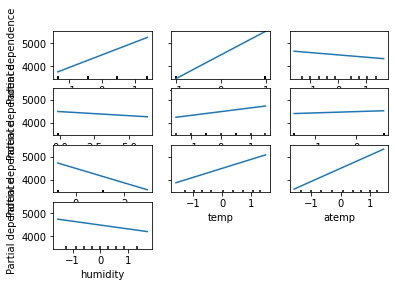

In [43]:
#Using PartialDependenceDisplay
from sklearn.inspection import PartialDependenceDisplay,plot_partial_dependence
my_plots = plot_partial_dependence(regressor1,       
                                   features=[0,1,2,3,4,5,6,7,8,9], # column numbers of plots we want to show
                                   X=X_train,            # raw predictors data.
                                   feature_names=['season','year','month','holiday','weekday','workingday','weather_condition','temp','atemp','humidity','windspeed','total_count'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

4) Take one of the models from assignment 2 according to your individual variant (Random
Forest, XGBoost, CatBoost, LightGBM) and output its build-in variable importance built
with “Mean decrease in Impurity” method (use model.feature_importances_).
Compare the results with results of previously considered methods in steps 1-4. Make
conclusions.

**Cat Boost regression**

Streaming output truncated to the last 5000 lines.
8:	learn: 1534.0070649	total: 11.9ms	remaining: 1.31s
9:	learn: 1498.9529008	total: 13.2ms	remaining: 1.31s
10:	learn: 1464.7207173	total: 14.8ms	remaining: 1.33s
11:	learn: 1428.3285345	total: 16.5ms	remaining: 1.36s
12:	learn: 1397.9016187	total: 17.5ms	remaining: 1.33s
13:	learn: 1364.8790242	total: 19.2ms	remaining: 1.35s
14:	learn: 1333.5785972	total: 20.9ms	remaining: 1.37s
15:	learn: 1305.4801873	total: 22.5ms	remaining: 1.38s
16:	learn: 1278.4407653	total: 24.2ms	remaining: 1.4s
17:	learn: 1251.4704378	total: 25.8ms	remaining: 1.41s
18:	learn: 1228.0021581	total: 27.5ms	remaining: 1.42s
19:	learn: 1203.2838262	total: 29.2ms	remaining: 1.43s
20:	learn: 1179.5294655	total: 30.8ms	remaining: 1.44s
21:	learn: 1155.8108170	total: 32.6ms	remaining: 1.45s
22:	learn: 1133.8334526	total: 34.4ms	remaining: 1.46s
23:	learn: 1112.4831009	total: 36.1ms	remaining: 1.47s
24:	learn: 1091.1800946	total: 37.9ms	remaining: 1.48s
25:	learn: 1070.2

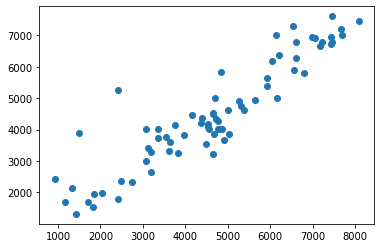

In [23]:
#Write your code for XGBoost regression here 
regressor2 = CatBoostRegressor()
regressor2.fit(X_train, y_train)

y_pred = regressor2.predict(X_test)

print("Cat Boost Regressor")
plt.scatter(y_test,y_pred)
regressor=regressor2.score(X_train,y_train)
print("Accuracy",regressor)
#R2 score
r2_scores = cross_val_score(regressor2, X_train, y_train, cv=10)
print('R-squared score :',np.average(r2_scores))

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [63]:
import eli5
from eli5.sklearn import PermutationImportance
perm1 = PermutationImportance(regressor2, random_state=1).fit(X_train,y_train)
eli5.show_weights(perm1, feature_names = ['season','year','month','holiday','weekday','workingday','weather_condition','temp','atemp','humidity','windspeed',])

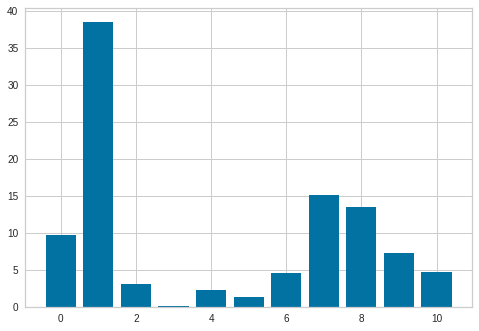

In [64]:
from matplotlib import pyplot
pyplot.bar(range(len(regressor2.feature_importances_)), regressor2.feature_importances_)
pyplot.show()

From the results of CatBoost regressor for feature importance it is clear that the feature 'year' has more feature importance over others based on impurity reduction

# **`Task 3 “Evaluate the variable importance in your built deep neural network locally for several predictions” `**

1) Use “LIME” method to calculate the variables importance of your build neural networks
locally for several instances of the dataset. Select the instances to predict according to your
individual variant. Present the results as a bar plot. Use
lime.lime_tabular.LimeTabularExplainer in mode=”regression”.

In [27]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 15.4 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=178a676ae439672859f66dc37603550ef8d3eddfa37baf578e3e813b6b61dac4
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [28]:
import lime
from lime import lime_tabular

#variable importance for the 5th attribute FastingBS

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=['season','year','month','holiday','weekday','workingday','weather_condition','temp','atemp','humidity','windspeed'],
    class_names=['weekday'],
    mode='regression'
)

In [29]:
i = 25
exp = explainer.explain_instance(X_train[i], regressor2.predict, num_features=5)

'exp = explainer.explain_instance(\n    data_row=X_test[0], \n    predict_fn=model.predict(X_test)\n)'

In [30]:
#Used show_in_notebook to display a more interactive version
exp.show_in_notebook(show_table=True)

In [31]:
import lime
from lime import lime_tabular

#variable importance for the 6th attribute FastingBS
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=['season','year','month','holiday','weekday','workingday','weather_condition','temp','atemp','humidity','windspeed'],
    class_names=['workingday'],
    mode='regression'
)



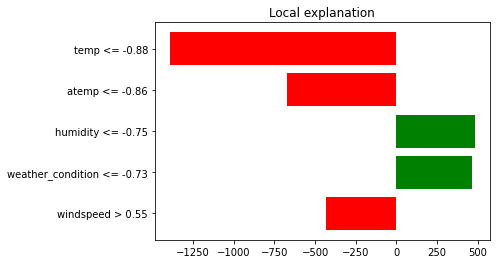

In [32]:
i = 24
exp = explainer.explain_instance(X_train[i], regressor2.predict, num_features=5)

exp.show_in_notebook(show_table=True)

#Barplot representation

exp.as_pyplot_figure();#Initially it returned 2 bar plots but when a semi-colon was added it returned only one barchart


# **`Task 4 ““Evaluate how independent variables influence the target variables construction Partial-Dependence Plots (PDP)”  `**

1) Construct a PDP for each of the independent variables in your dataset (Use from
sklearn.inspection import PartialDependenceDisplay)

Constructing Partial Dependencies for few features for better representation

17/17 [==============================] - 0s 2ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


17/17 [==============================] - 0s 2ms/step


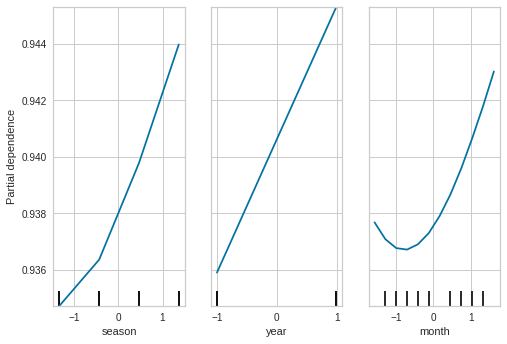

In [62]:
#Using PartialDependenceDisplay
from sklearn.inspection import PartialDependenceDisplay,plot_partial_dependence
my_plots = plot_partial_dependence(model,       
                                   features=[0,1,2], # column numbers of plots we want to show
                                   X=X_train,            # raw predictors data.
                                   feature_names=['season','year','month','holiday','weekday','workingday','weather_condition','temp','atemp','humidity','windspeed','total_count'], # labels on graphs
                                   grid_resolution=40) # number of values to plot on x axis

Constructing partial dependencies for all the possible existing features

 1/17 [>.............................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


17/17 [==============================] - 0s 1ms/step


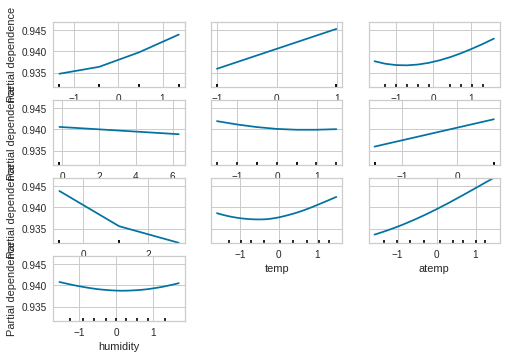

In [54]:
#Using PartialDependenceDisplay
from sklearn.inspection import PartialDependenceDisplay,plot_partial_dependence
my_plots = plot_partial_dependence(model,       
                                   features=[0,1,2,3,4,5,6,7,8,9], # column numbers of plots we want to show
                                   X=X_train,            # raw predictors data.
                                   feature_names=['season','year','month','holiday','weekday','workingday','weather_condition','temp','atemp','humidity','windspeed','total_count'], # labels on graphs
                                   grid_resolution=40) # number of values to plot on x axis



From the result of PartialDependenceDisplay the attributes, 'season','year','workingday'and 'atemp' linearly increases with that of the target

Only the attribute 'weather condition' has linearly decreased

The other attributes seems to have maintained their overall range throughout